In [2]:
import numpy as np 
import pandas as pd


In [3]:
df1 = pd.read_csv('data/fraud.csv')
df1['isFraud'] = 1

df2 = pd.read_csv('data/non_fraud.csv')
df2['isFraud'] = 0


In [4]:
df = pd.concat([df1, df2], ignore_index=True)
df.shape

(5178, 7)

In [5]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,DISPONIBLE,OLDDISPONIBLE,STEP,ACCOUNT,AMAOUNT,CANAL,isFraud
0,474876,574876,2024-07-12T08:22:17.682Z,3489861211000100,100000,SYMON,0
1,-52870288,-52551213,2024-07-29T11:16:47.935Z,2373137221014600,319075,1,0
2,-181,0,2024-07-17T12:25:02.583Z,3897964211006000,5000,SYMON,1
3,2309018,1443518,2024-07-16T13:54:02.383Z,4215125211009301,865500,SYHBK,0
4,223925292,223835292,2024-08-02T08:27:56.703Z,4694733221009500,90000,1,0


In [6]:
columns_to_convert = ['DISPONIBLE', 'OLDDISPONIBLE', 'AMAOUNT', 'ACCOUNT']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
df.dtypes

DISPONIBLE       float64
OLDDISPONIBLE    float64
STEP              object
ACCOUNT          float64
AMAOUNT          float64
CANAL             object
isFraud            int64
dtype: object

In [7]:
df = df.dropna()
df.isnull().sum()


DISPONIBLE       0
OLDDISPONIBLE    0
STEP             0
ACCOUNT          0
AMAOUNT          0
CANAL            0
isFraud          0
dtype: int64

In [8]:
df.describe()

,DISPONIBLE,OLDDISPONIBLE,ACCOUNT,AMAOUNT,isFraud
count,5.176000e+03,5.176000e+03,5.176000e+03,5.176000e+03,5176.000000
mean,2.212873e+08,2.356768e+08,5.228281e+15,1.822752e+07,0.514297
std,2.998553e+09,3.009533e+09,2.108574e+15,2.523980e+08,0.499844
min,-8.291939e+10,-8.204939e+10,6.342792e+14,2.900000e+02,0.000000
25%,-5.599050e+04,0.000000e+00,3.483824e+15,3.000000e+04,0.000000
50%,-4.446000e+03,1.016000e+03,4.839837e+15,1.000000e+05,1.000000
75%,1.130460e+06,1.177935e+06,6.649750e+15,4.200000e+05,1.000000
max,7.099113e+10,7.098313e+10,9.993648e+15,1.498500e+10,1.000000


In [9]:
df["isFraud"].value_counts()

isFraud
1    2662
0    2514
Name: count, dtype: int64

In [10]:
df["STEP"] = df["STEP"].apply(pd.to_datetime)


In [11]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
df.dtypes

DISPONIBLE                   float64
OLDDISPONIBLE                float64
STEP             datetime64[ns, UTC]
ACCOUNT                      float64
AMAOUNT                      float64
CANAL                         object
isFraud                        int64
dtype: object

In [14]:
df_encoded = pd.get_dummies(df, columns=['CANAL'], prefix='CANAL')
df_encoded.head()

,DISPONIBLE,OLDDISPONIBLE,STEP,ACCOUNT,AMAOUNT,isFraud,CANAL_1,CANAL_SYHBK,CANAL_SYMON
0,474876.0,574876.0,2024-07-12 08:22:17.682000+00:00,3.489861e+15,100000.0,0,False,False,True
1,-52870288.0,-52551213.0,2024-07-29 11:16:47.935000+00:00,2.373137e+15,319075.0,0,True,False,False
2,-181.0,0.0,2024-07-17 12:25:02.583000+00:00,3.897964e+15,5000.0,1,False,False,True
3,2309018.0,1443518.0,2024-07-16 13:54:02.383000+00:00,4.215125e+15,865500.0,0,False,True,False
4,223925292.0,223835292.0,2024-08-02 08:27:56.703000+00:00,4.694733e+15,90000.0,0,True,False,False


In [15]:
df_encoded['CANAL_1'] = df_encoded['CANAL_1'].astype(int)
df_encoded['CANAL_SYMON'] = df_encoded['CANAL_SYMON'].astype(int)
df_encoded['CANAL_SYHBK'] = df_encoded['CANAL_SYHBK'].astype(int)

df_encoded.dtypes
df_encoded.head()

,DISPONIBLE,OLDDISPONIBLE,STEP,ACCOUNT,AMAOUNT,isFraud,CANAL_1,CANAL_SYHBK,CANAL_SYMON
0,474876.0,574876.0,2024-07-12 08:22:17.682000+00:00,3.489861e+15,100000.0,0,0,0,1
1,-52870288.0,-52551213.0,2024-07-29 11:16:47.935000+00:00,2.373137e+15,319075.0,0,1,0,0
2,-181.0,0.0,2024-07-17 12:25:02.583000+00:00,3.897964e+15,5000.0,1,0,0,1
3,2309018.0,1443518.0,2024-07-16 13:54:02.383000+00:00,4.215125e+15,865500.0,0,0,1,0
4,223925292.0,223835292.0,2024-08-02 08:27:56.703000+00:00,4.694733e+15,90000.0,0,1,0,0


In [16]:
df_encoded['TYPE'] = df_encoded.apply(lambda row: 'D' if row['DISPONIBLE'] < row['OLDDISPONIBLE'] else 'C', axis=1)


In [17]:
df_encoded = pd.get_dummies(df_encoded, columns=['TYPE'], prefix='TYPE')

df_encoded['TYPE_D'] = df_encoded['TYPE_D'].astype(int)
df_encoded['TYPE_C'] = df_encoded['TYPE_C'].astype(int)


In [18]:
df_encoded.head()

,DISPONIBLE,OLDDISPONIBLE,STEP,ACCOUNT,AMAOUNT,isFraud,CANAL_1,CANAL_SYHBK,CANAL_SYMON,TYPE_C,TYPE_D
0,474876.0,574876.0,2024-07-12 08:22:17.682000+00:00,3.489861e+15,100000.0,0,0,0,1,0,1
1,-52870288.0,-52551213.0,2024-07-29 11:16:47.935000+00:00,2.373137e+15,319075.0,0,1,0,0,0,1
2,-181.0,0.0,2024-07-17 12:25:02.583000+00:00,3.897964e+15,5000.0,1,0,0,1,0,1
3,2309018.0,1443518.0,2024-07-16 13:54:02.383000+00:00,4.215125e+15,865500.0,0,0,1,0,1,0
4,223925292.0,223835292.0,2024-08-02 08:27:56.703000+00:00,4.694733e+15,90000.0,0,1,0,0,1,0


In [25]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df_encoded.dtypes

DISPONIBLE                   float64
OLDDISPONIBLE                float64
STEP             datetime64[ns, UTC]
ACCOUNT                      float64
AMAOUNT                      float64
isFraud                        int64
CANAL_1                        int32
CANAL_SYHBK                    int32
CANAL_SYMON                    int32
TYPE_C                         int32
TYPE_D                         int32
dtype: object

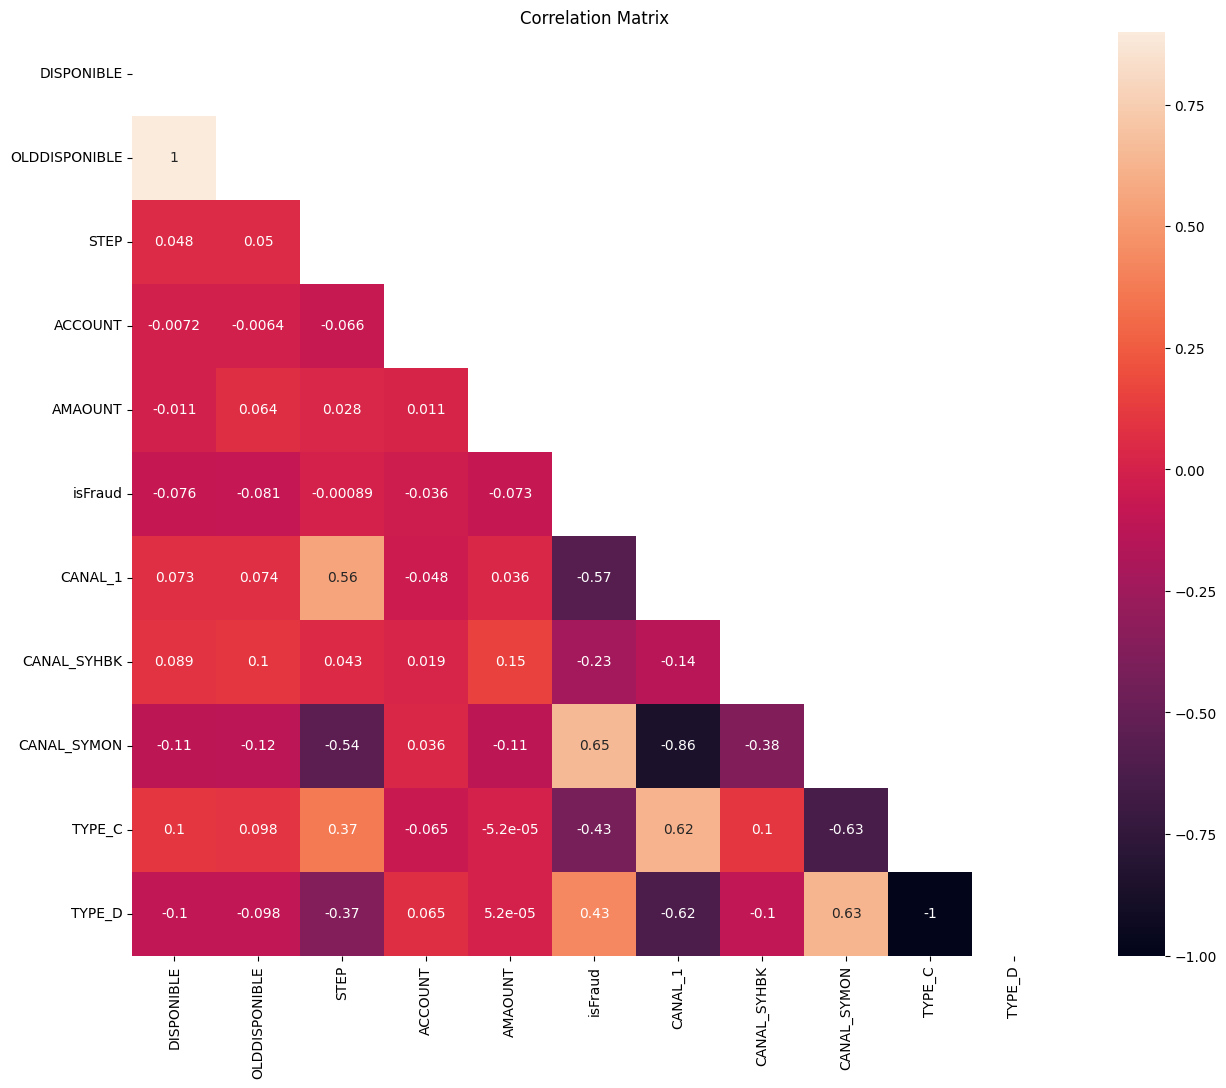

In [35]:
corr = df_encoded.select_dtypes(include=['datetime64[ns, UTC]','float64', 'int32', 'int64']).corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(corr, mask=mask, vmax=0.9, square=True, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [42]:
df_encoded = df_encoded.drop(columns=['STEP'])

In [43]:
y = df_encoded['isFraud']
x = df_encoded.drop(columns=['isFraud'])

<Axes: xlabel='isFraud', ylabel='count'>

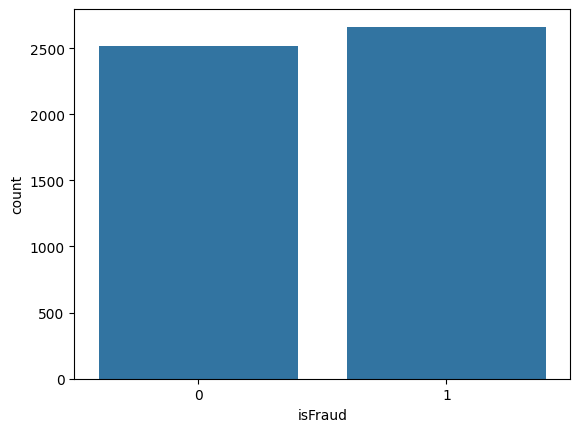

In [48]:
sns.countplot(x='isFraud', data=df_encoded)


In [49]:
!pip install lazypredict


  Obtaining dependency information for lazypredict from https://files.pythonhosted.org/packages/bb/df/936639581c018ac59b1096d34e42d39e967d97bf09b1fdb1645e64852e36/lazypredict-0.2.12-py2.py3-none-any.whl.metadata
  Obtaining dependency information for click from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/d9/28/3be76b591a2e14a031b681b8283acf1dec2ad521f6f1701b7957df68c466/lightgbm-4.5.0-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/e2/7b/8c1b410cd0604cee9a167a19f7e1746f5b92ae7d02ad574ab560b73c5a48/xgboost-2.1.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
   ------------ --------------------------- 30.7/97.9 kB 1.3 MB/s eta 0:00:01
   ------------------------------

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [55]:
!pip install --upgrade lazypredict


In [57]:
from lazypredict.Supervised import LazyClassifier


In [58]:
clf = LazyClassifier(random_state=42)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

 97%|█████████▋| 30/31 [00:07<00:00,  2.72it/s]

[LightGBM] [Info] Number of positive: 2129, number of negative: 2011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1035
[LightGBM] [Info] Number of data points in the train set: 4140, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514251 -> initscore=0.057020
[LightGBM] [Info] Start training from score 0.057020
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

100%|██████████| 31/31 [00:07<00:00,  3.97it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [59]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.49
BaggingClassifier,1.00,1.00,1.00,1.00,0.10
XGBClassifier,1.00,1.00,1.00,1.00,2.06
RandomForestClassifier,1.00,1.00,1.00,1.00,0.43
LGBMClassifier,1.00,1.00,1.00,1.00,0.52
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.02
ExtraTreesClassifier,1.00,1.00,1.00,1.00,0.32
ExtraTreeClassifier,0.98,0.98,0.98,0.98,0.02
QuadraticDiscriminantAnalysis,0.83,0.83,0.83,0.82,0.06


In [60]:
from sklearn.tree import ExtraTreeClassifier
model = ExtraTreeClassifier()

In [61]:
model.fit(x_train,y_train)

ExtraTreeClassifier()

In [63]:
y_pred = model.predict(x_test)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       503
           1       0.99      0.99      0.99       533

    accuracy                           0.99      1036
   macro avg       0.99      0.99      0.99      1036
weighted avg       0.99      0.99      0.99      1036



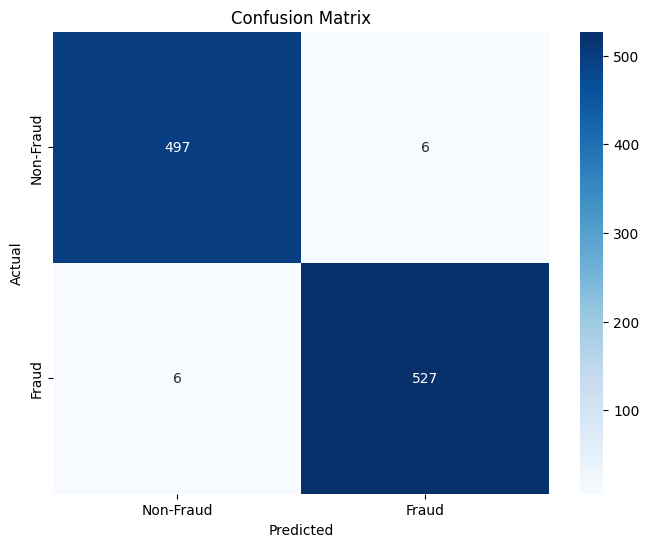

In [65]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Fraud', 'Fraud'], 
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [66]:
import joblib
joblib.dump(model, 'fraud_detection_model.pkl')


['fraud_detection_model.pkl']